# ~ Analyzing Overwatch Competitive Rankings ~

### First let's import some essential libraries and read our data into a data frame.

In [1]:
# import statements
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('Overwatch Competitive Ranks.csv')
df.tail()

,Timestamp,What rank (number between 1 and 100) did you receive after placement matches?
3584,2016/06/30 6:13:53 PM EST,45
3585,2016/06/30 6:28:27 PM EST,43
3586,2016/06/30 6:34:39 PM EST,47
3587,2016/06/30 6:40:18 PM EST,40
3588,2016/06/30 7:13:09 PM EST,48


### Cool, we can see that we have a few thousand entries of raw input from the above.

In [3]:
# strip any string entries out of the dataframe, convert strings to NaN
# drop NaN values
df = pd.to_numeric(df['What rank (number between 1 and 100) did you receive after placement matches? '], errors='coerce')
df.dropna(inplace=True)

In [4]:
# convert back to DataFrame object
# drop any values outside of range 1-100
df2 = pd.DataFrame(df)
df2 = df2.rename(columns={'What rank (number between 1 and 100) did you receive after placement matches? ': 'rank'})
df2 = df2.drop(df2[(df2['rank'] < 10.0) | (df2['rank'] > 85.0)].index)

In [5]:
# cleaned dataset information
df2.describe()

,rank
count,3410.000000
mean,51.876833
std,7.015096
min,10.000000
25%,48.000000
50%,52.000000
75%,56.000000
max,81.000000


### Let's deal with outliers by chopping off the first and last 5% of the data.

In [6]:
# first, we need to sort
df2 = df2['rank'].sort_values()

In [7]:
# now, grab that ten percent variable and subtract it off
five_percent = (df2.count()) / 20
df_chopped = df2[five_percent:len(df2)-five_percent]

### One more describe prior to plotting the data. This gives us the insights we've been looking for. Basically we ditched 500 rows of noise and outliers, leaving us with a little over 3,000 rows.

In [8]:
pd.DataFrame(df_chopped).describe()

,rank
count,3070.000000
mean,51.903583
std,4.927479
min,41.000000
25%,48.000000
50%,52.000000
75%,55.000000
max,63.000000


### Let's graph the distribution. Importing the seaborn library is essential for turning a standard matplotlib graph into a *sleeker, better looking* graph.

//anaconda/lib/python2.7/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


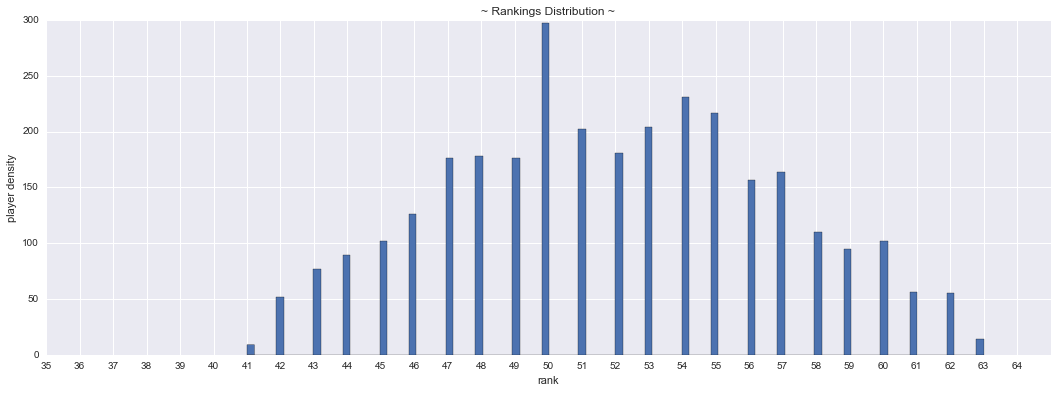

In [9]:
sns.set_style("darkgrid")

fig, ax = plt.subplots(figsize=(18,6))

ax.hist(df_chopped,bins=100)

start, end = 35,65
ax.xaxis.set_ticks(np.arange(start, end, 1))
ax.set_xlim([start,end])
ax.set_title('~ Rankings Distribution ~')
ax.set_xlabel('rank')
ax.set_ylabel('player density')

fig.show()